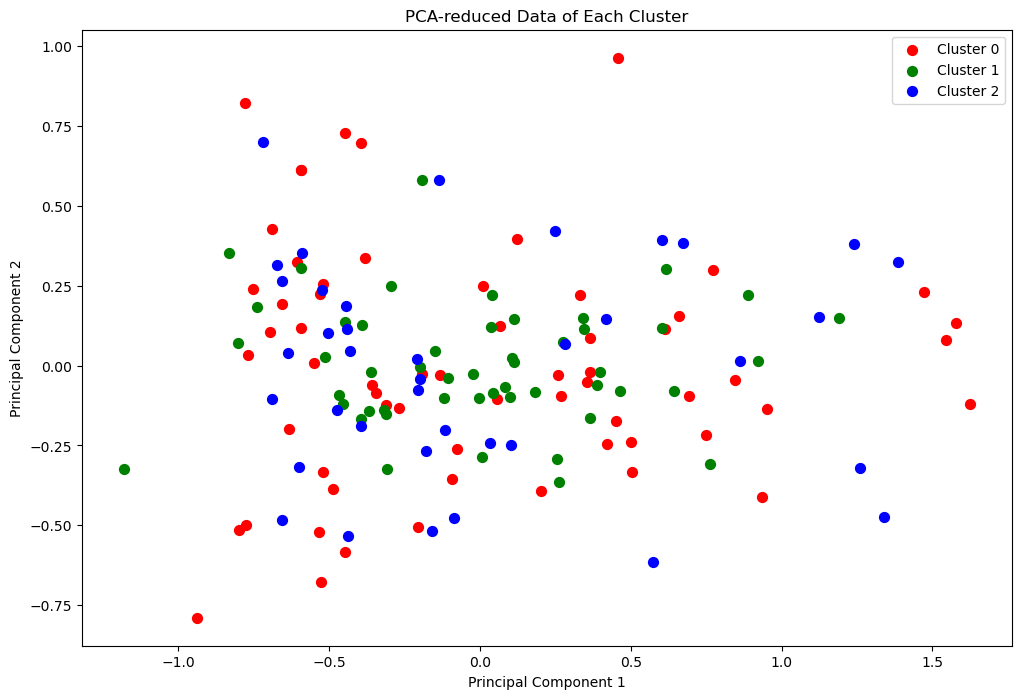

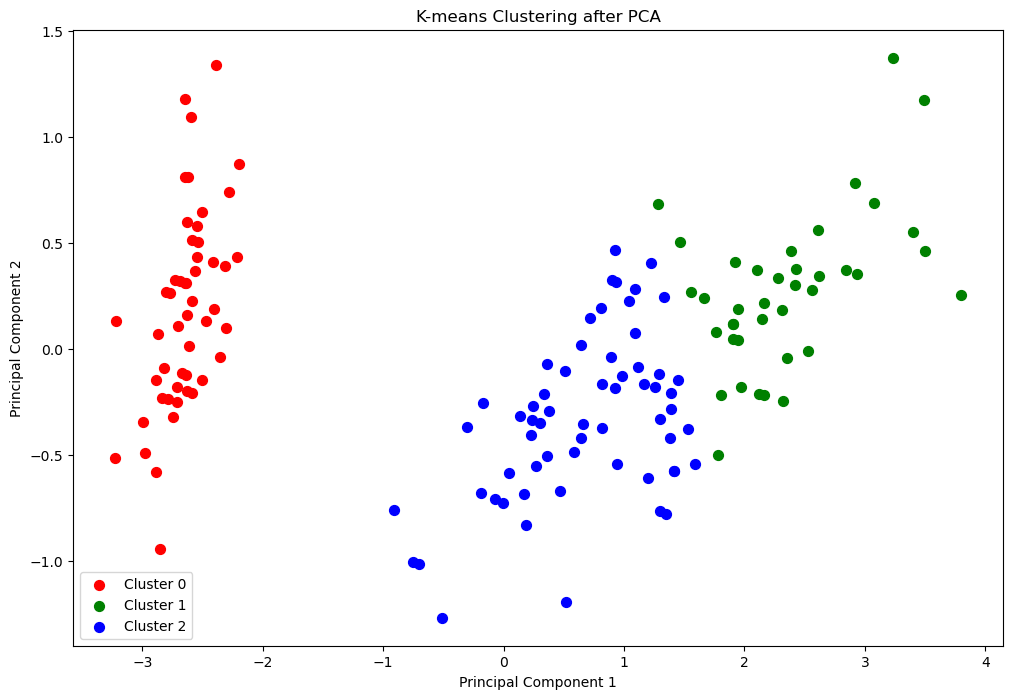

For original data with n_clusters = 3, the silhouette score is: 0.55
For PCA-reduced data with n_clusters = 3, the silhouette score is: 0.60


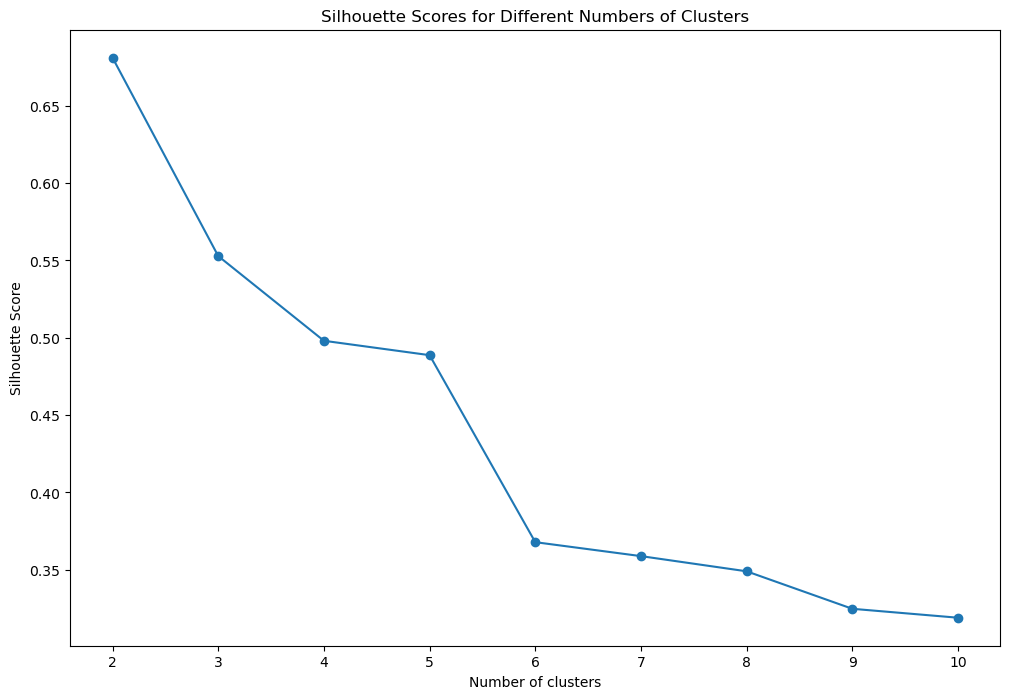

In [11]:
# 设置环境变量以避免内存泄漏
import os
os.environ['OMP_NUM_THREADS'] = '1'

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

# 加载鸢尾花数据集
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

# 导入聚类库
from sklearn.cluster import KMeans

# 使用k-means聚类，将数据分为3个簇，设置随机种子为0
kmeans = KMeans(n_clusters=3, n_init=10,random_state=0)
kmeans.fit(X)
Y_kmeans = kmeans.predict(X)

# 将数据分为3个簇
X_cluster_0 = X[Y_kmeans == 0]
X_cluster_1 = X[Y_kmeans == 1]
X_cluster_2 = X[Y_kmeans == 2]

# 导入PCA库进行降维
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# 对每个簇的数据使用PCA降维到2维空间
X_cluster_0_pca = pca.fit_transform(X_cluster_0)
X_cluster_1_pca = pca.fit_transform(X_cluster_1)
X_cluster_2_pca = pca.fit_transform(X_cluster_2)

# 可视化结果
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.scatter(X_cluster_0_pca[:, 0], X_cluster_0_pca[:, 1], s=50, color='red', label='Cluster 0')
plt.scatter(X_cluster_1_pca[:, 0], X_cluster_1_pca[:, 1], s=50, color='green', label='Cluster 1')
plt.scatter(X_cluster_2_pca[:, 0], X_cluster_2_pca[:, 1], s=50, color='blue', label='Cluster 2')
plt.title('PCA-reduced Data of Each Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# 先对整个数据集进行PCA降维
X_pca = pca.fit_transform(X)

# 再进行k-means聚类
kmeans_pca_after = KMeans(n_clusters=3,n_init=10,random_state=0)# 使用k-means聚类，将数据分为3个簇，设置随机种子为0
kmeans_pca_after.fit(X_pca)
Y_kmeans_pca = kmeans_pca_after.predict(X_pca)

# 可视化结果
plt.figure(figsize=(12, 8))
colors = ['red','green','blue']
for i in range(3):
    plt.scatter(X_pca[Y_kmeans_pca == i,0],X_pca[Y_kmeans_pca == i,1],s=50,color = colors[i],label = f'Cluster {i}')
plt.title('K-means Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

from sklearn.metrics import silhouette_score
# 计算原始数据的轮廓系数
silhouette_avg = silhouette_score(X, Y_kmeans)
print(f"For original data with n_clusters = 3, the silhouette score is: {silhouette_avg:.2f}")

# 计算降维后数据的轮廓系数
silhouette_avg_pca = silhouette_score(X_pca, Y_kmeans_pca)
print(f"For PCA-reduced data with n_clusters = 3, the silhouette score is: {silhouette_avg_pca:.2f}")

# 计算不同聚类数的轮廓系数，并存储结果
silhouette_scores = []
range_n_clusters = list(range(2, 11))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,n_init=10,random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 绘制轮廓系数与聚类数的关系图
plt.figure(figsize=(12, 8))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.show()
